In [4]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd


'\nprint("#############################")\nxc = [x[0] for x in image_stats.keys()]\nyc = [y[1] for y in image_stats.keys()]\nfig = plt.figure()\nplt.scatter(xc, yc, s=list(image_stats.values()))\nplt.show()\n\n#fig.tight_layout()\n#plt.savefig(\'output.png\', dpi=300)\n'

In [132]:
data_folder = "data"
years = [str(i) for i in range(2006, 2008)]

classes_30 = ["Asterionellopsis", "bad", "Chaetoceros", "Chaetoceros_flagellate", "Ciliate_mix", "Corethron", "Cylindrotheca", "Dictyocha","dino30", "detritus",
	"Dinobryon", "Ditylum", "Eucampia", "flagellate_sp3", "Guinardia_delicatula", "Guinardia_flaccida", "Guinardia_striata", "Heterocapsa_triquetra", "Laboea_strobila", "Leptocylindrus",
	"pennate", "Phaeocystis", "Pleurosigma", "Prorocentrum", "Pseudonitzschia", "Skeletonema", "Thalassionema", "Thalassiosira", "Thalassiosira_dirty", "Tintinnid"]

#another approach is to get all classes and get its stats
all_classes = [name for name in os.listdir(data_folder+"/"+years[0]) if os.path.isdir(data_folder+"/"+years[0]+"/"+name)]

class_stats = {c_name:{ year:[0] for year in years} for c_name in classes_30}

image_files = []
for year in years:
    data_path = data_folder+"/"+year

    if os.path.isdir(data_path):
        non_hab_causing = [0]
        for class_name in os.listdir(data_path):
            if class_name not in classes_30:
                continue
            c_path = data_path + "/"+class_name


            if os.path.isdir(c_path):
                image_files.extend([ [class_name] + [y for y in x.split("_")] for x in os.listdir(c_path) if ".png" in x])
classes_df = pd.DataFrame(image_files, columns = ["class", "IFCB", "year", "day", "time", "order"])

#print(classes_df)



In [137]:
y = classes_df.groupby(['class', 'year', 'day', 'time']).agg(['count']).reset_index()
y.index = pd.to_datetime(y.year +'-' +y.day +" "+ y.time, format='%Y-%j %H%M%S')


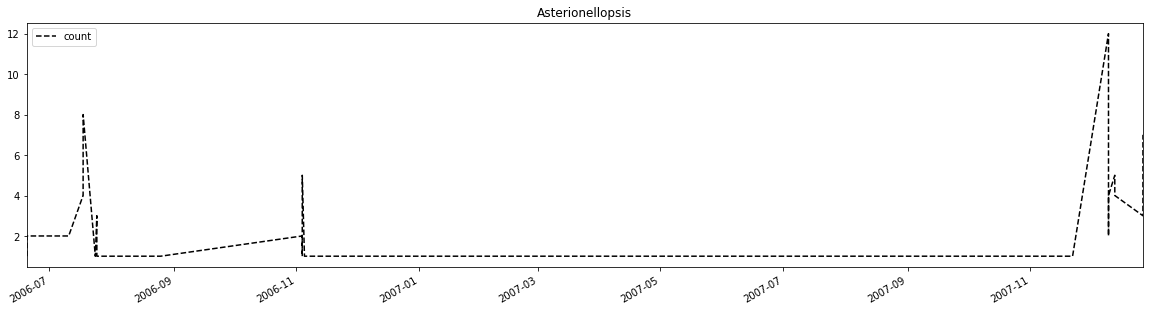

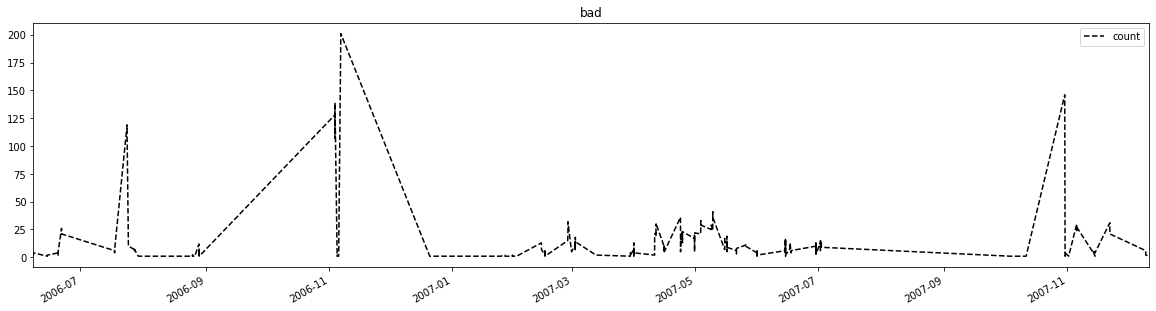

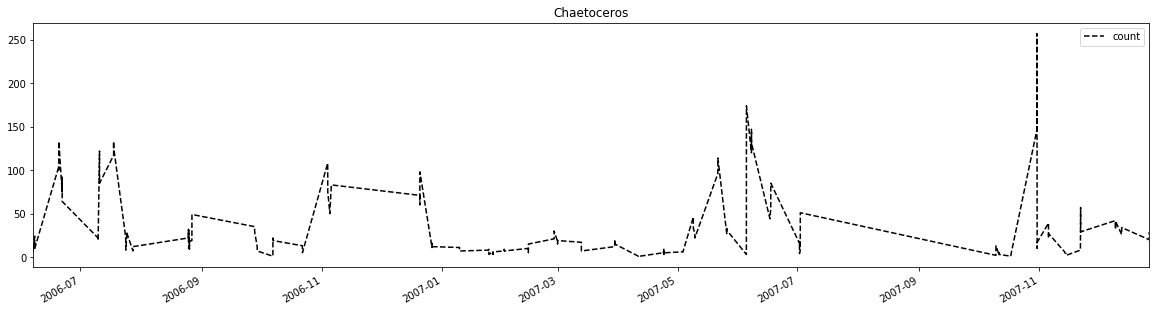

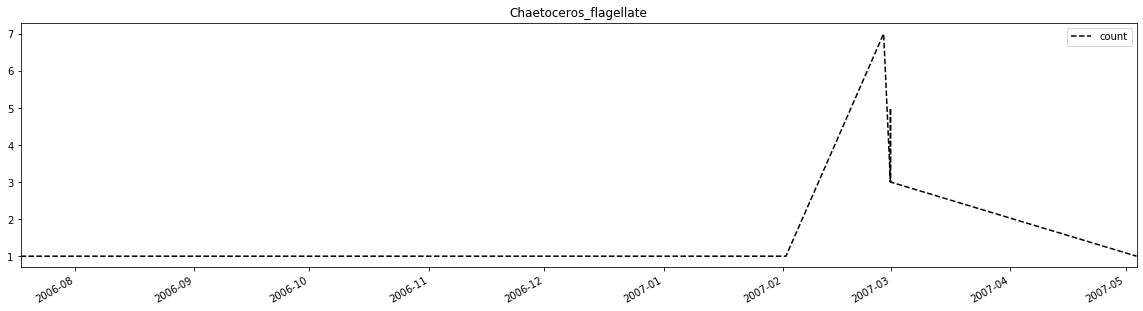

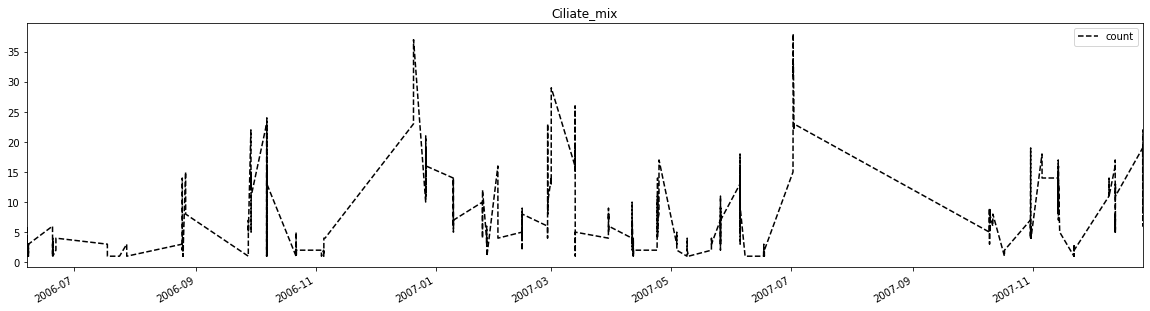

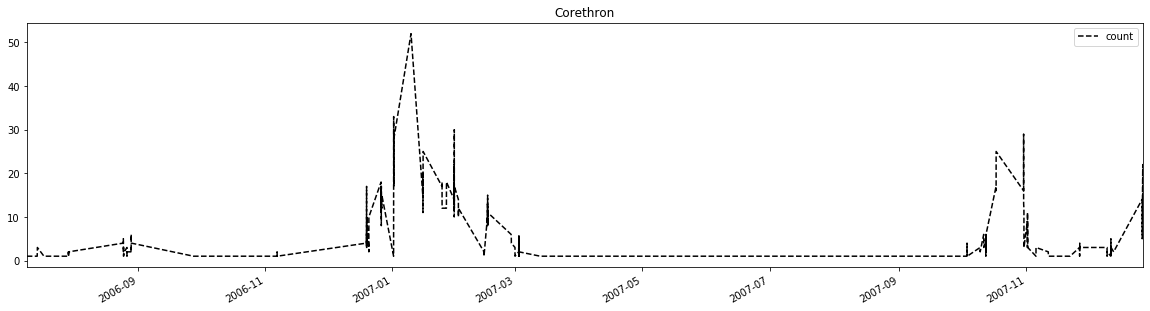

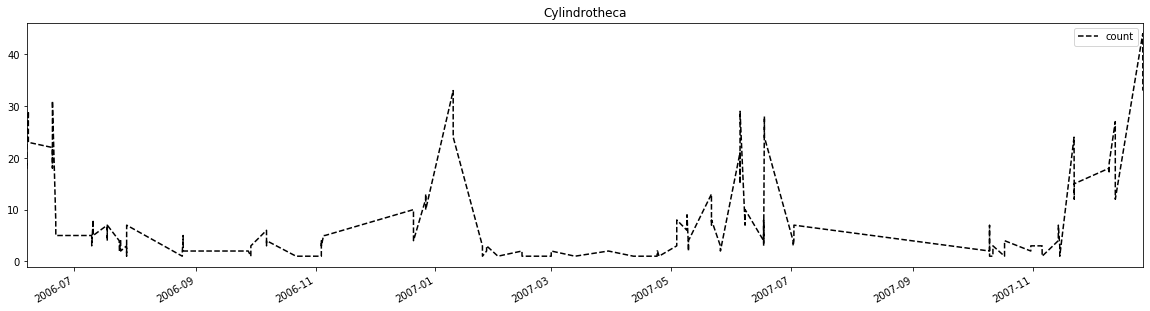

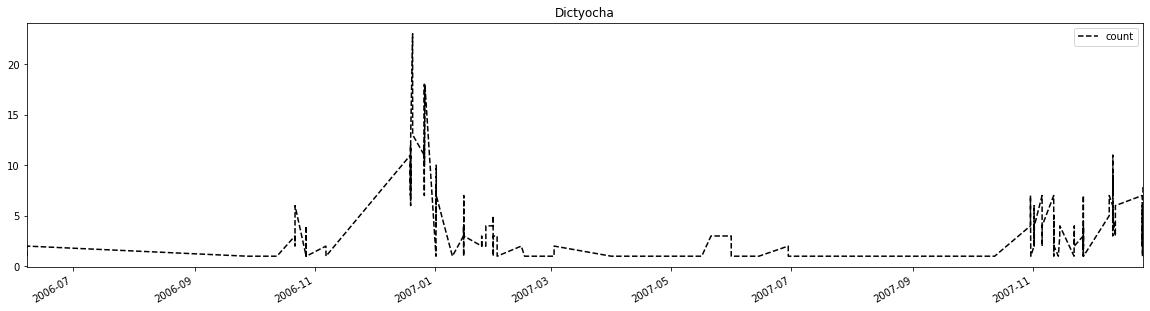

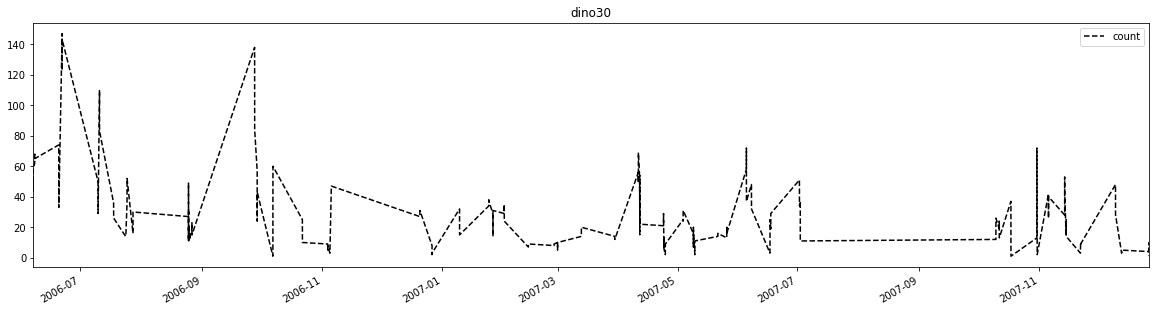

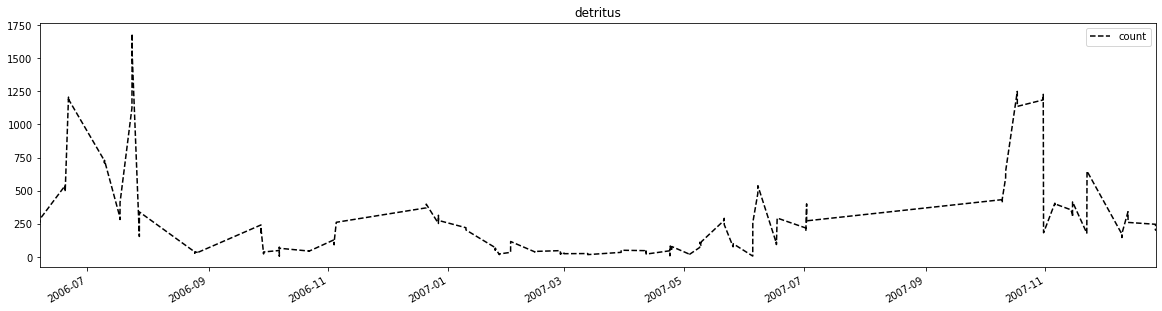

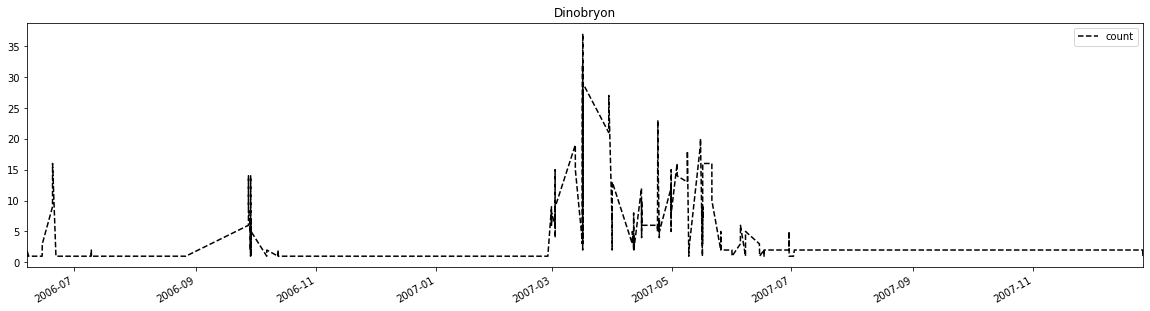

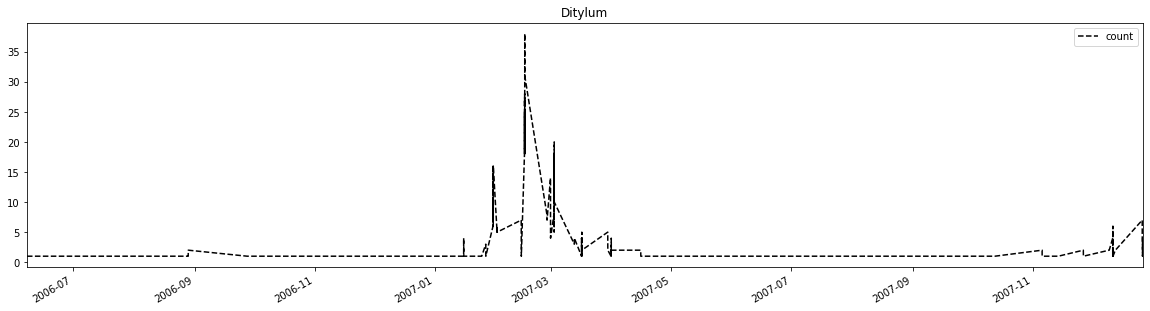

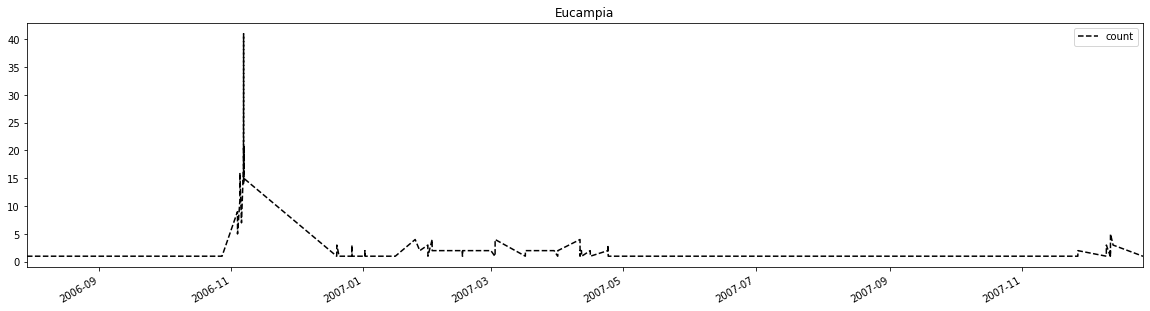

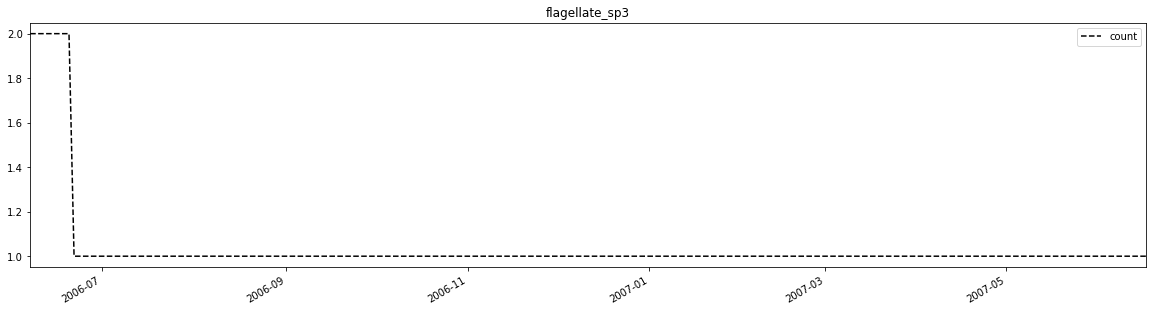

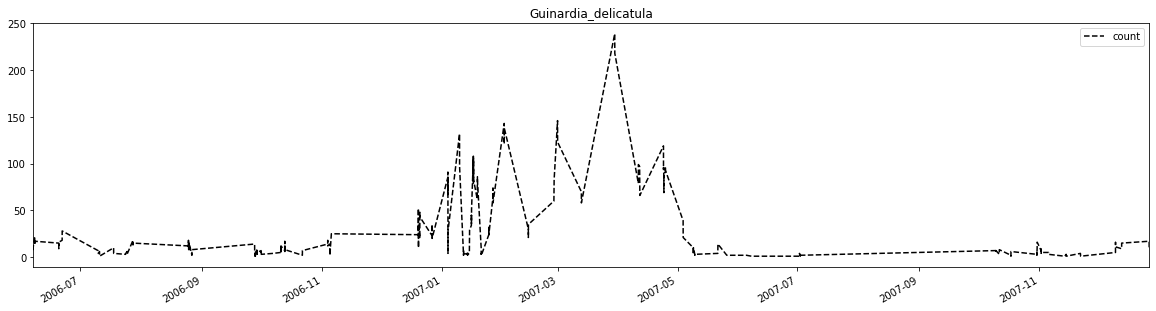

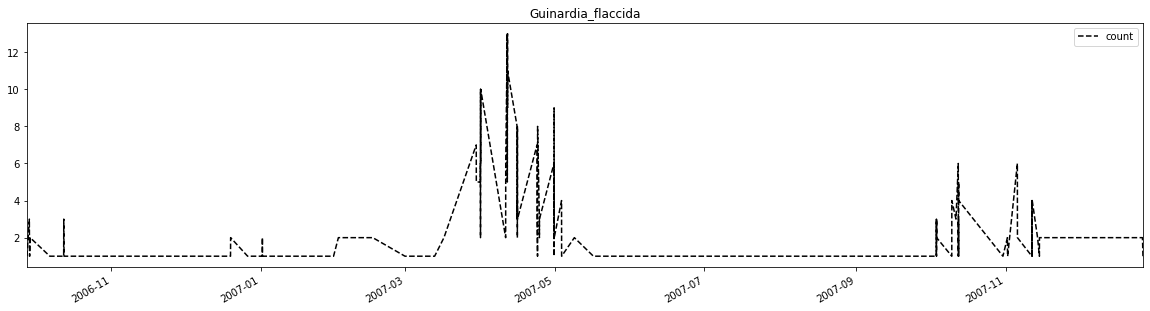

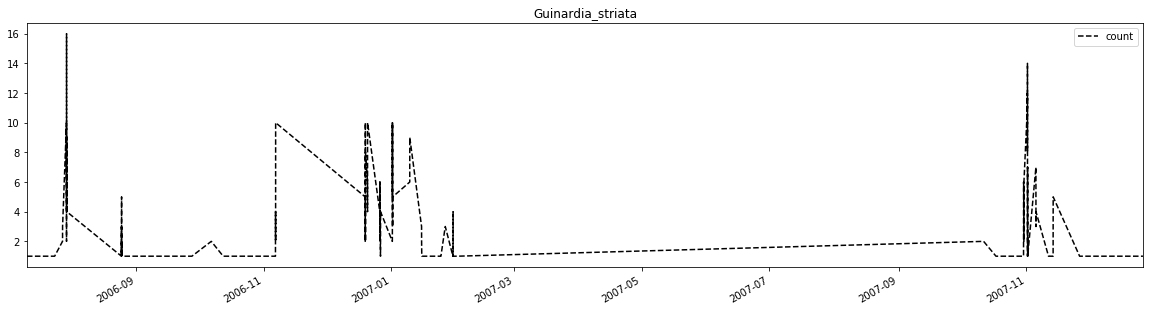

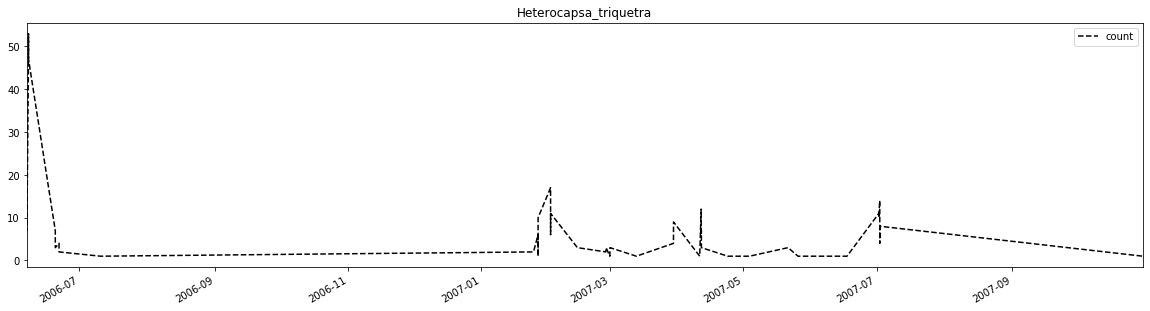

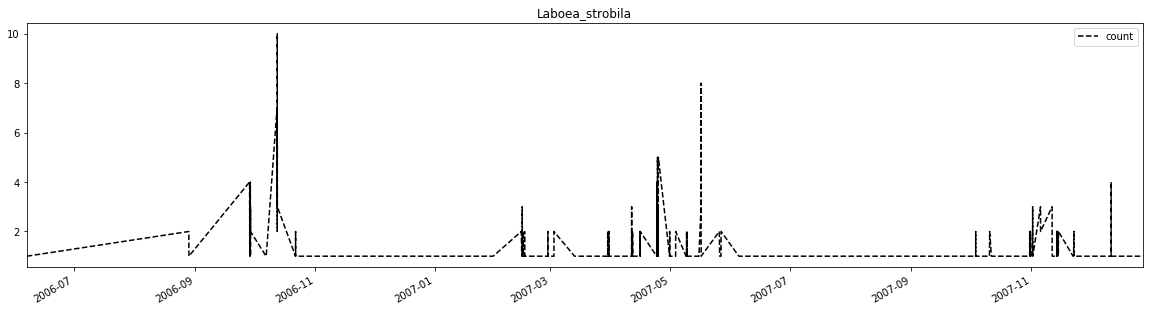

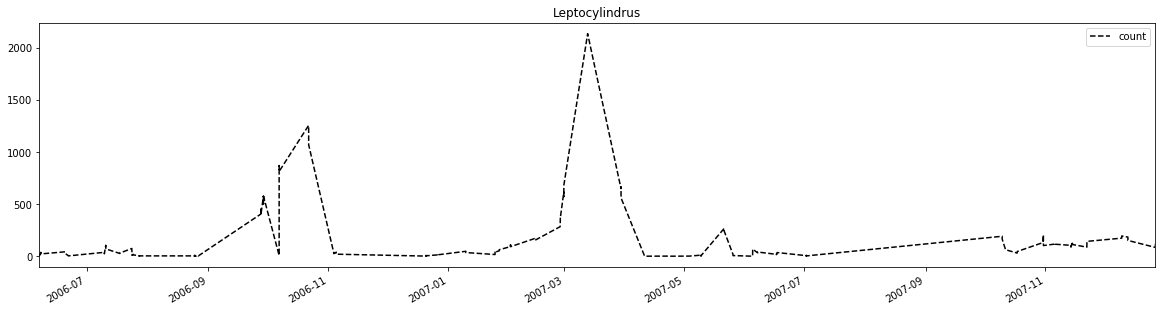

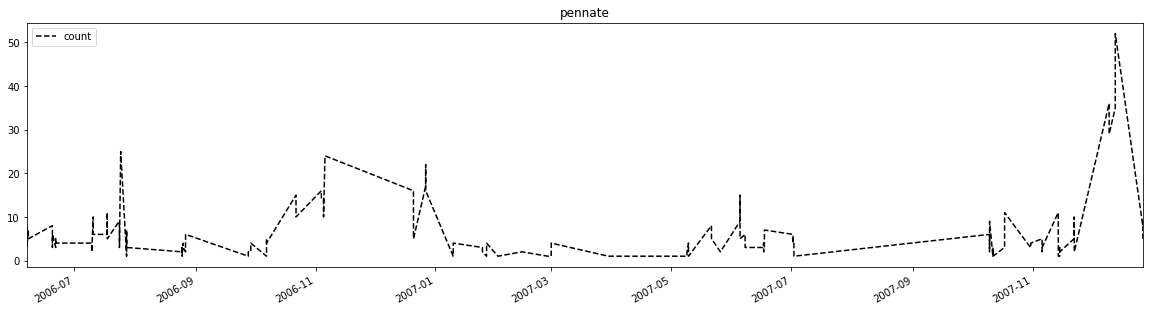

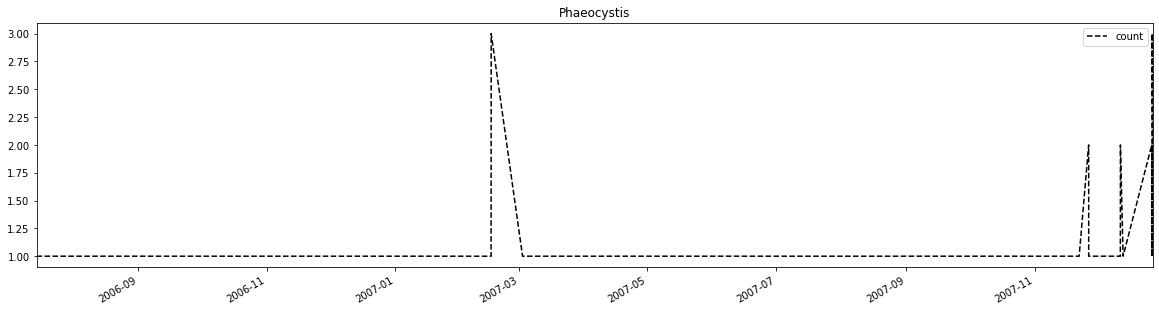

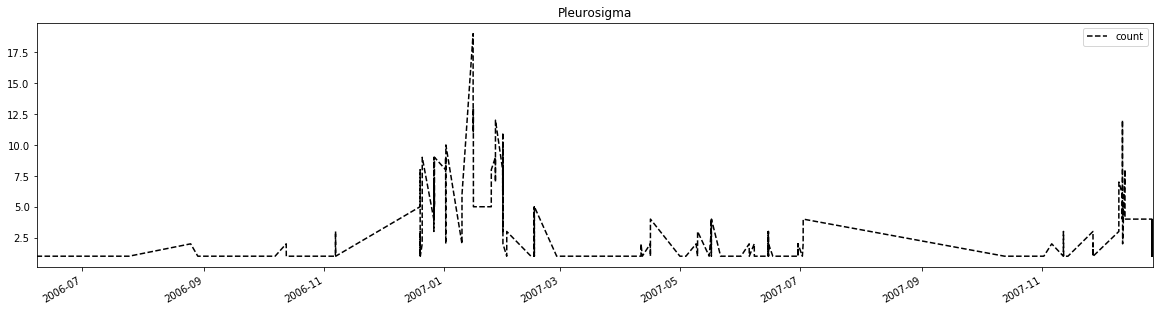

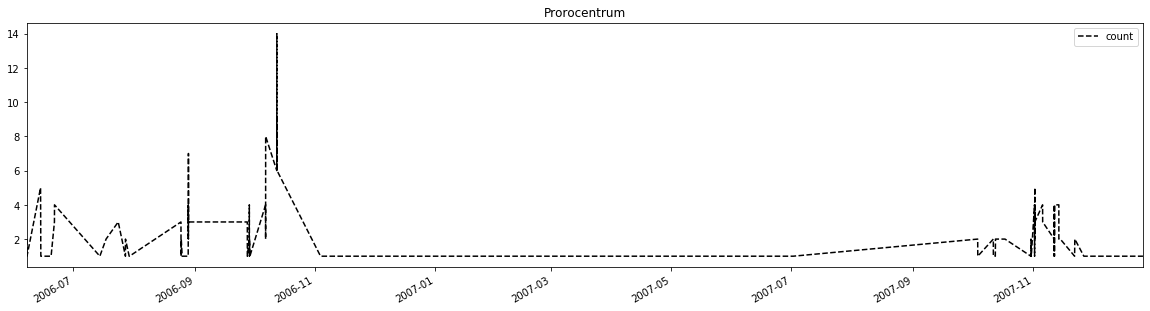

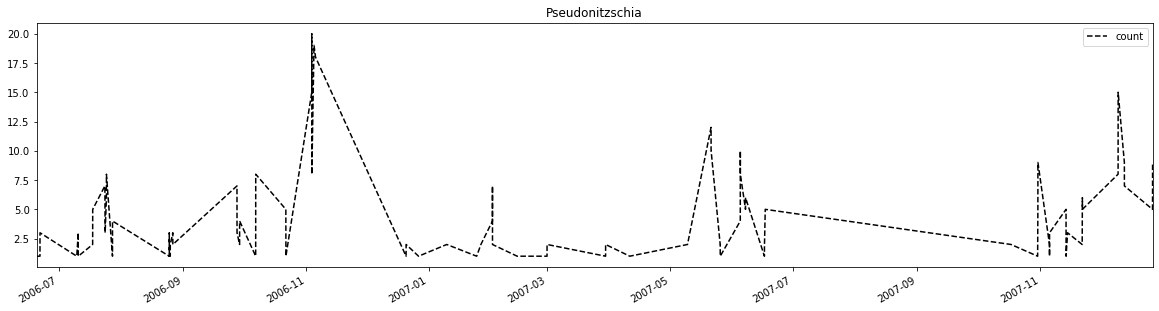

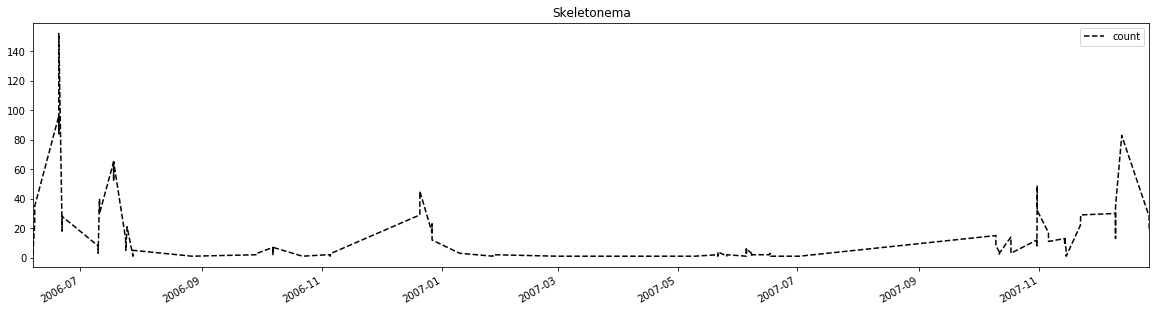

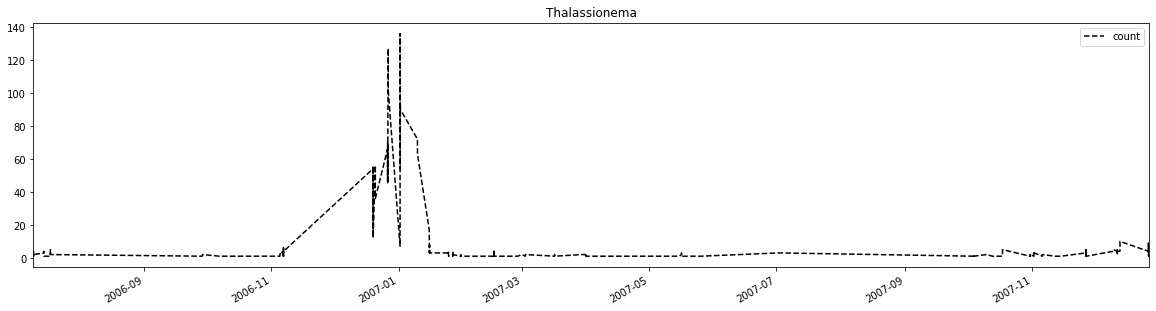

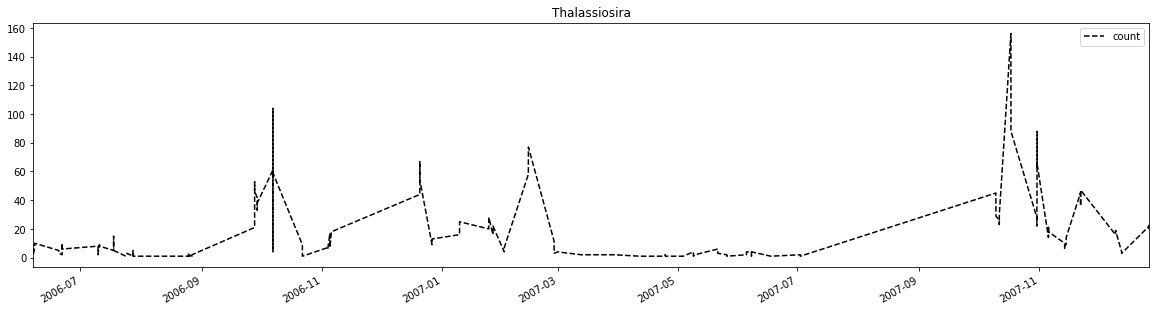

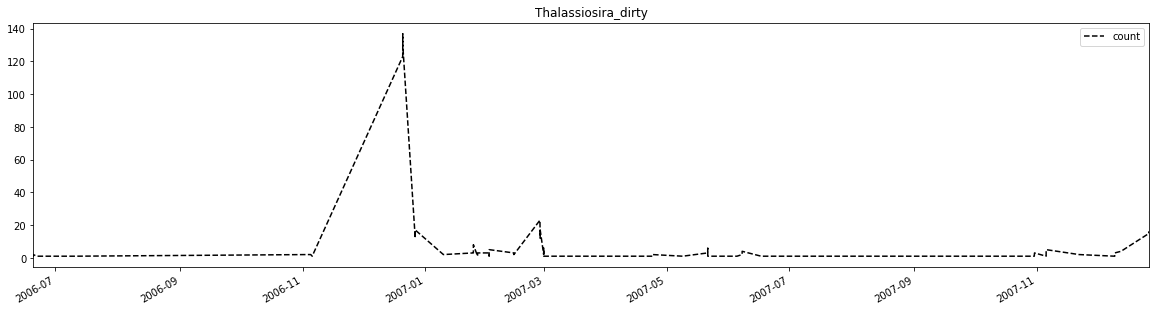

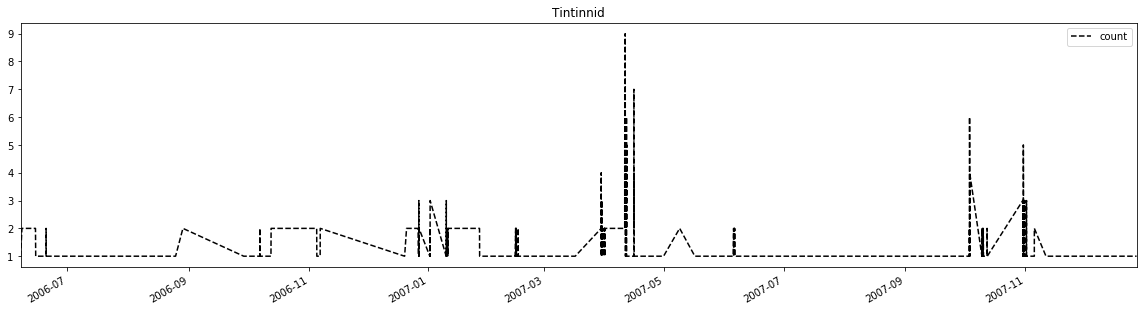

In [158]:
plt.rcParams['figure.figsize'] = [20, 5]
for c_name in classes_30:
    c = y.loc[y['class'] == c_name]
    c.plot(y='order', style='k--')
    plt.title(c_name)
    plt.show()
    